# Лабораторная работа №8. Полиномиальная регрессия.
## Шкуратова Д.В.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

## Данные
Возьмем учебный набор из R, содержащий наблюдения по 5 деревьям, их возрасте (в днях) и обхват плода в мм 

In [38]:
df = pd.read_csv('Orange.csv')
df.head()

,rownames,Tree,age,circumference
0,1,1,118,30
1,2,1,484,58
2,3,1,664,87
3,4,1,1004,115
4,5,1,1231,120


In [39]:
df.describe()

,rownames,Tree,age,circumference
count,35.000000,35.00000,35.000000,35.000000
mean,18.000000,3.00000,922.142857,115.857143
std,10.246951,1.43486,491.864528,57.488179
min,1.000000,1.00000,118.000000,30.000000
25%,9.500000,2.00000,484.000000,65.500000
50%,18.000000,3.00000,1004.000000,115.000000
75%,26.500000,4.00000,1372.000000,161.500000
max,35.000000,5.00000,1582.000000,214.000000


<Axes: xlabel='Tree', ylabel='count'>

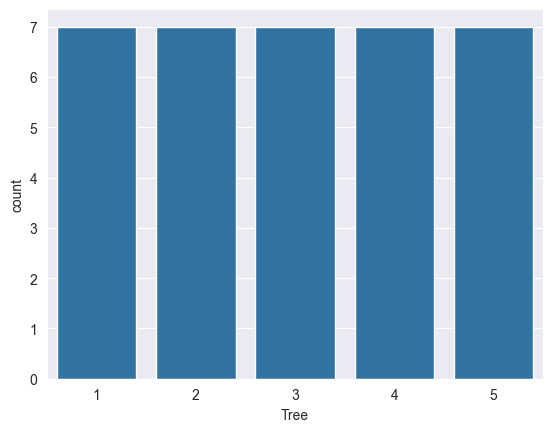

In [40]:
sns.countplot(df, x='Tree')

<Axes: xlabel='age', ylabel='circumference'>

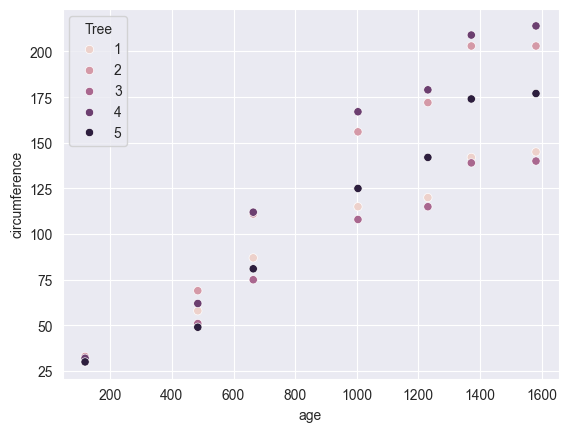

In [41]:
sns.scatterplot(df, x= 'age', y = 'circumference', hue='Tree')

Если рассматривать наблюдения по всем деревьям, то смотря на график можем предположить, что линейная регрессия хорошо аппроксимирует зависимость обхвата плода от возраста, но в конце графика приращение незначительно, у нас мало данных (всего 5 деревьев), чтобы предсказать значения обхвата для большего значения возраста.

Количество наблюдений по каждому дереву одинаково. Построим линейную и полиномиальную регрессию для оценки зависимости обхвата апельсина от возраста дерева.

In [104]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:, 2:3].values
y = df.iloc[:, 3].values
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

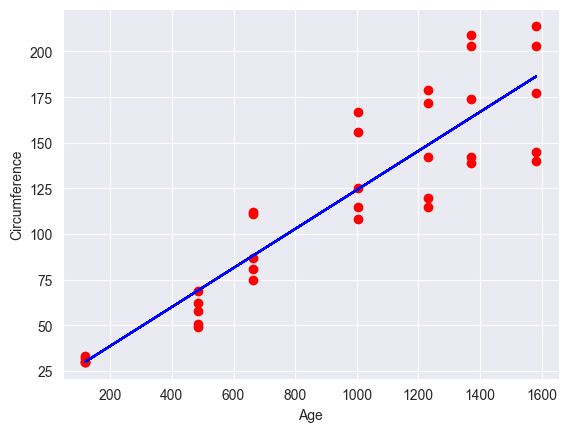

In [107]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.xlabel('Age')
plt.ylabel('Circumference')
plt.show()

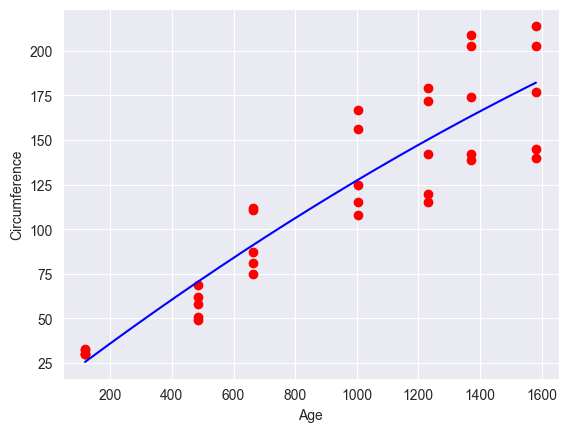

In [108]:
X_grid = np.arange(np.min(X), np.max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.xlabel('Age')
plt.ylabel('Circumference')
plt.show()

Полином степени 2 не сильно отличается от линейной регрессии.


Построим график полиномиальной регрессии для разных значений степени полинома

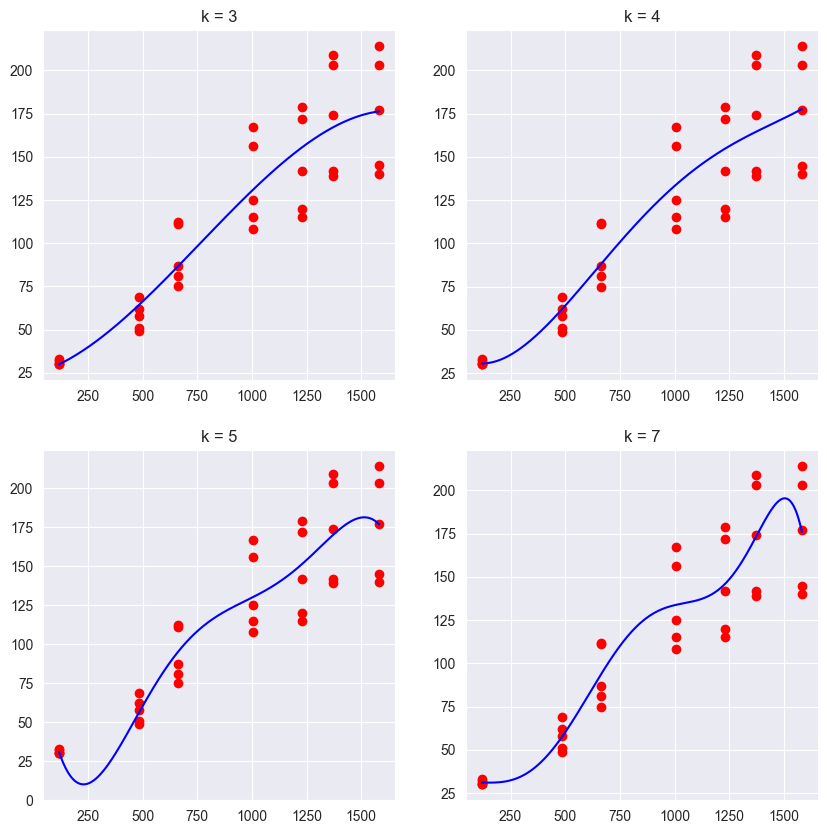

In [98]:
degree = [3, 4, 5, 7]
prediction = []
for i in degree:
    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, y)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    prediction.append(lin_reg.predict(poly_reg.fit_transform(X_grid)))

fig = plt.figure(figsize=(10, 10))
for i in range(len(prediction)):
    plt.subplot(2, 2, i+1)
    plt.plot(X_grid, prediction[i], color = 'blue')
    plt.scatter(X, y, color = 'red')
    plt.title(f'k = {degree[i]}')
plt.show()


Лучше всего модель полиномиальной регрессии соответствует данным при степенях не выше 4, начиная со степени 5, видим несоответствие модели данным, так как полиномы степени выше 4 слишком быстро убывают начиная со значения ~1300.
Еще на первом графике мы видели, что данные неплохо описываются прямой, поэтому брать степень выше 4 нет смысла.
